<a href="https://colab.research.google.com/github/JeromeMberia/KNN_and_Naive_Bayes/blob/main/Independent_Project_Week_9(Titanic__Data_Set).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Titanic Data Set**

## Defining the Question

### Specifying the Data Analytic Question

> Predicting wheather person can survive or not based on it's features 

### Defining the Metric for Success

> Getting an accuracy of 80 or above it.

### Understanding the context 

> This is titanic data frame does not contain information from the crew, but it
does contain actual ages of half of the passengers. The principal source for data about. Titanic passengers is the Encyclopedia Titanica. The datasets used here were begun by a variety of researchers.

### Recording the Experimental Design

1. Load , read and explore the dataset.
2. Clean the dataset.
3. Perform Exploratory Data Analysis.
4. Create k-nearest neighbors(KNN) modal.
    

## The Dataset

### Importing the libraries

In [507]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Models
from sklearn.neighbors import KNeighborsClassifier

# others
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

# constant
RANDOM_STATE = 42
cv = 10

### Reading the dataset

In [508]:
Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')

### Checking the dataset

#### Train

In [509]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [510]:
Train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [511]:
Train.columns.values.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [512]:
Train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [513]:
rows = Train.shape[0]
columns = Train.shape[1]
print(f'This dataset has {columns} columns and {rows} rows')

This dataset has 12 columns and 891 rows


In [514]:
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [515]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [516]:
Train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [517]:
col = list(Train.columns)
for i in col:
  print(f'{i}')
  print('')
  print(Train[i].unique())
  print('****************************************************************************')
  print('')

PassengerId

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 2

#### Test

In [518]:
Test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [519]:
Test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [520]:
Test.columns.values.tolist()

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [521]:
Test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [522]:
rows = Test.shape[0]
columns = Test.shape[1]
print(f'This dataset has {columns} columns and {rows} rows')

This dataset has 11 columns and 418 rows


In [523]:
Test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [524]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [525]:
Test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [526]:
col = list(Test.columns)
for i in col:
  print(f'{i}')
  print('')
  print(Test[i].unique())
  print('****************************************************************************')
  print('')

PassengerId

[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 108

## Data Wrangling / Data Cleaning

### Duplicate Records

#### Train

In [527]:
Train.duplicated().sum()

0

#### Test

In [528]:
Test.duplicated().sum()

0

### Irrelevant Data

In [529]:
Train.columns.values.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [530]:
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [531]:
dropped = ['PassengerId','Name','Ticket', 'Cabin', 'Fare'] 
Train = Train.drop(dropped,axis=1)
Test = Test.drop(dropped,axis=1)

### Missing Data

In [532]:
Train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [533]:
Test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [534]:
Test.loc[(Test['Pclass'] == 1) & (Test['Age'].isnull()), 'Age'] = Test[(Test['Pclass']==1)]['Age'].mean()
Test.loc[(Test['Pclass'] == 2) & (Test['Age'].isnull()), 'Age'] = Test[(Test['Pclass']==2)]['Age'].mean()
Test.loc[(Test['Pclass'] == 3) & (Test['Age'].isnull()), 'Age'] = Test[(Test['Pclass']==3)]['Age'].mean()

In [535]:
Train.loc[(Train['Pclass'] == 1) & (Train['Age'].isnull()), 'Age'] = Train[(Train['Pclass']==1)]['Age'].mean()
Train.loc[(Train['Pclass'] == 2) & (Train['Age'].isnull()), 'Age'] = Train[(Train['Pclass']==2)]['Age'].mean()
Train.loc[(Train['Pclass'] == 3) & (Train['Age'].isnull()), 'Age'] = Train[(Train['Pclass']==3)]['Age'].mean()

In [536]:
Train.loc[(Train['Embarked'].isnull()), 'Embarked'] = Train['Embarked'].mode()

In [537]:
Train['Embarked'] = Train['Embarked'].fillna(Train['Embarked'].mode()[0])

In [538]:
Test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [539]:
Train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

### Outliers

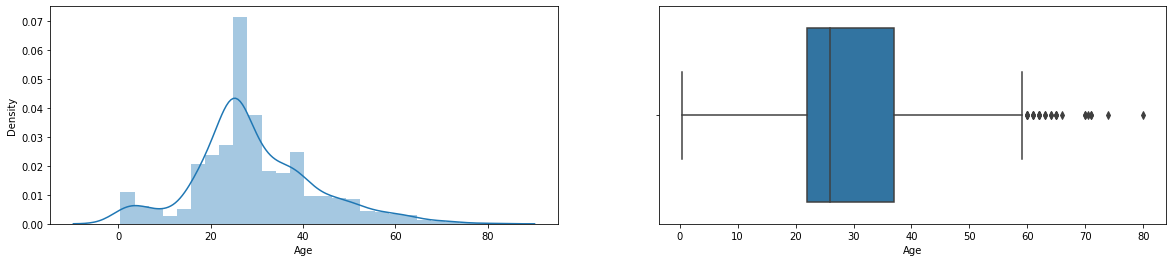

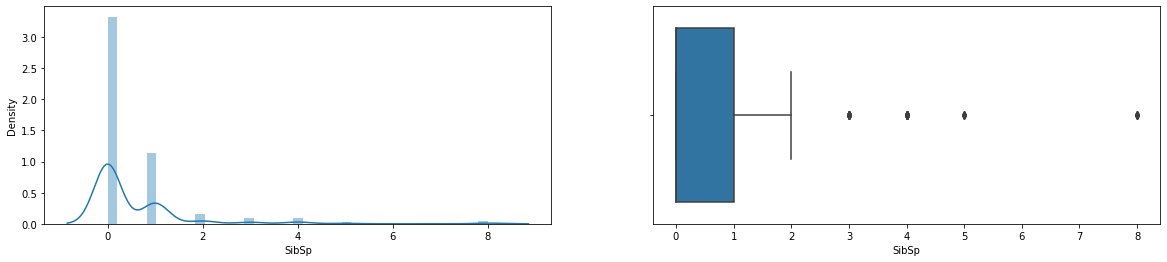

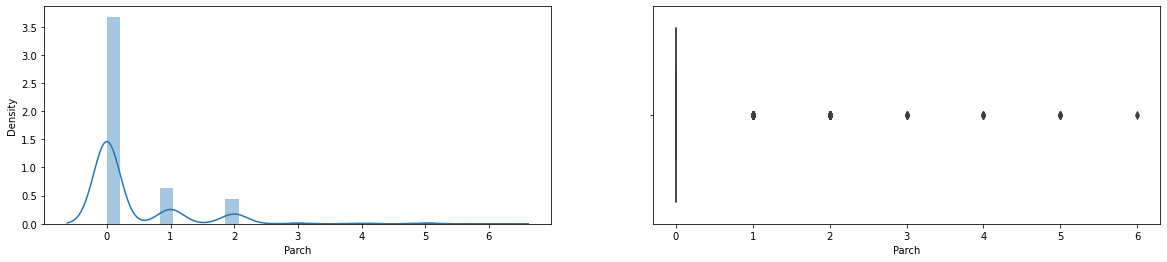

In [540]:
df = Train

numeric = Train[['Age','SibSp','Parch']]
columns = list(numeric.columns)
for column in columns:
  plo = plt.figure(figsize=(20,4))
  plo.add_subplot(1,2,1)
  sns.distplot(df[column])
  plo.add_subplot(1,2,2)
  sns.boxplot(df[column])

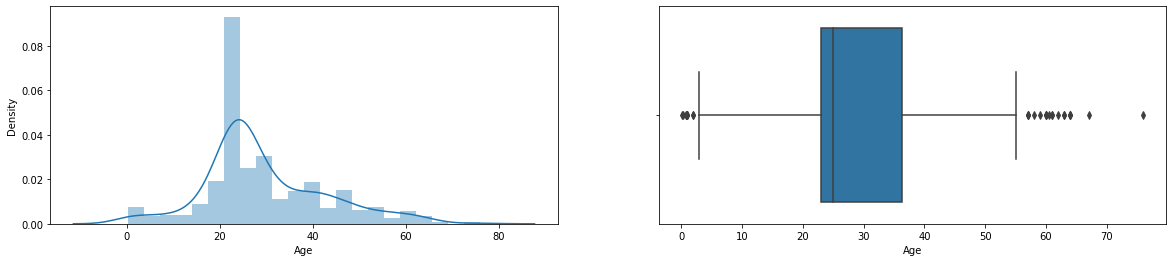

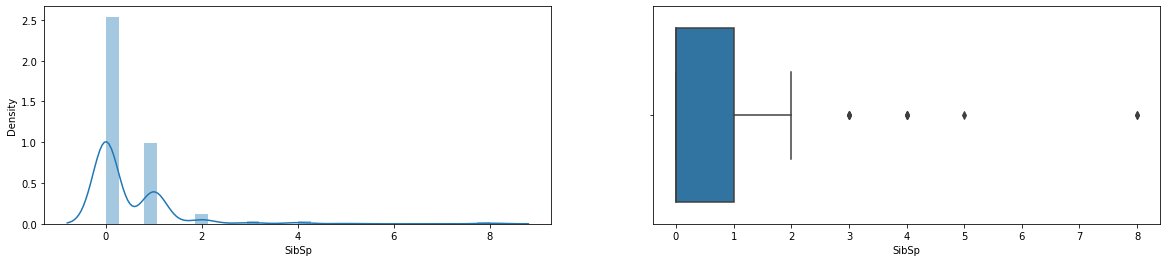

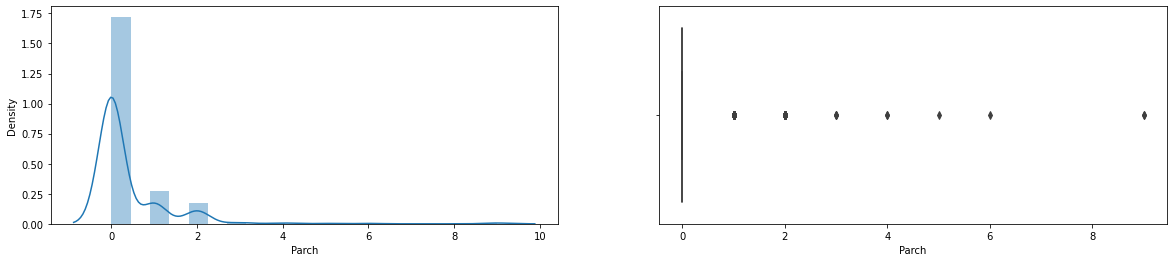

In [541]:
df = Test

numeric = Train[['Age','SibSp','Parch']]
columns = list(numeric.columns)
for column in columns:
  plo = plt.figure(figsize=(20,4))
  plo.add_subplot(1,2,1)
  sns.distplot(df[column])
  plo.add_subplot(1,2,2)
  sns.boxplot(df[column])

## Exploratory Data Analysis(EDA)

### Univariate Analysis

#### Categorical Variable

In [399]:
Train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'], dtype='object')

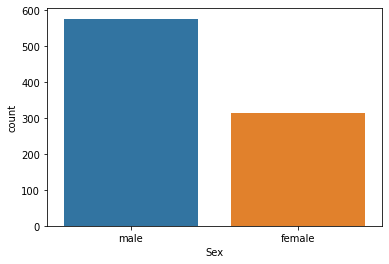

In [400]:
sns.countplot(Train['Sex'])

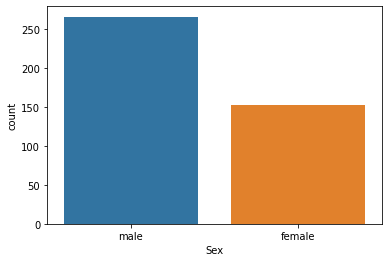

In [401]:
sns.countplot(Test['Sex'])

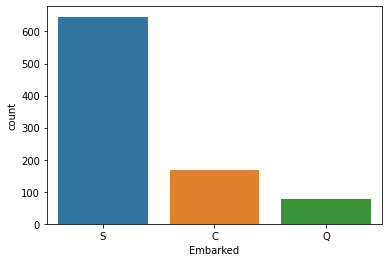

In [402]:
sns.countplot(Train['Embarked'])

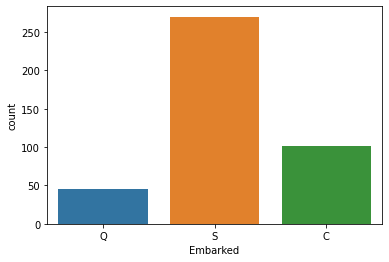

In [403]:
sns.countplot(Test['Embarked'])

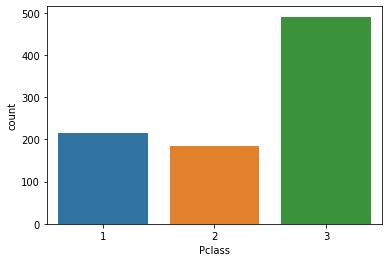

In [404]:
sns.countplot(Train['Pclass'])

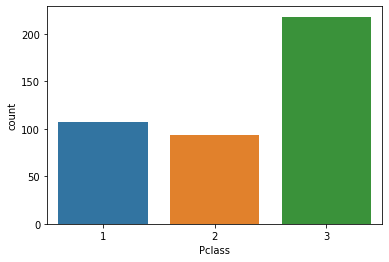

In [405]:
sns.countplot(Test['Pclass'])

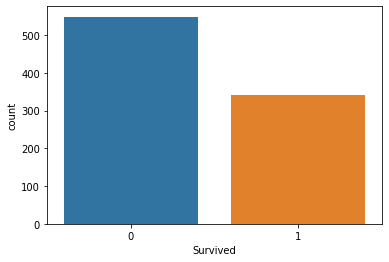

In [406]:
sns.countplot(Train['Survived'])

#### Numerical Variable

**1. Measures of Central Tendency**

In [407]:
# 1.1 Mean
numeric = Train[['Age','SibSp','Parch']]

columns = None
columns = list(numeric.columns)

for column in columns:
  mean = Train[column].mean()
  print(f'This is the mean of the {column} column: ')
  print(f'{mean}')
  print('  ')

This is the mean of the Age column: 
29.29287479027204
  
This is the mean of the SibSp column: 
0.5230078563411896
  
This is the mean of the Parch column: 
0.38159371492704824
  


In [408]:
numeric = Test[['Age','SibSp','Parch']]

columns = None
columns = list(numeric.columns)

for column in columns:
  mean = Test[column].mean()
  print(f'This is the mean of the {column} column: ')
  print(f'{mean}')
  print('  ')

This is the mean of the Age column: 
29.4082891409497
  
This is the mean of the SibSp column: 
0.4473684210526316
  
This is the mean of the Parch column: 
0.3923444976076555
  


In [409]:
# 1.2 Median
numeric = Train[['Age','SibSp','Parch']]
columns = list(numeric.columns)
for column in columns:
  median = Train[column].median()
  print(f'This is the median of the {column} column: ')
  print(f'{median}')
  print('  ')

This is the median of the Age column: 
26.0
  
This is the median of the SibSp column: 
0.0
  
This is the median of the Parch column: 
0.0
  


In [410]:
numeric = Test[['Age','SibSp','Parch']]
columns = list(numeric.columns)
for column in columns:
  median = Test[column].median()
  print(f'This is the median of the {column} column: ')
  print(f'{median}')
  print('  ')

This is the median of the Age column: 
25.0
  
This is the median of the SibSp column: 
0.0
  
This is the median of the Parch column: 
0.0
  


In [411]:
# 1.3 Mode
df = Train[['Survived', 'Age', 'SibSp', 'Parch']]
columns = list(df.columns)
for column in columns:
  mode = Train[column].mode()[0]
  print(f'This is the mode of the {column} column: ')
  print(f'{mode}')
  print('  ')

This is the mode of the Survived column: 
0
  
This is the mode of the Age column: 
25.14061971830986
  
This is the mode of the SibSp column: 
0
  
This is the mode of the Parch column: 
0
  


In [412]:
df = Test[['Age', 'SibSp', 'Parch']]
columns = list(df.columns)
for column in columns:
  mode = Test[column].mode()[0]
  print(f'This is the mode of the {column} column: ')
  print(f'{mode}')
  print('  ')

This is the mode of the Age column: 
24.02794520547945
  
This is the mode of the SibSp column: 
0
  
This is the mode of the Parch column: 
0
  


**2. Measures of Dispersion**

In [413]:
numeric = Train[['Age','SibSp','Parch']]
columns = list(numeric.columns)

In [414]:
numeric = Test[['Age','SibSp','Parch']]
columns = list(numeric.columns)

In [415]:
## 2.1 Standard Deviation
numeric = Train[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  standard_deviation = Train[column].std()
  print(f'This is the Standard Deviation of the {column} column: ')
  print(f'{standard_deviation}')
  print('  ')

This is the Standard Deviation of the Age column: 
13.210527334401556
  
This is the Standard Deviation of the SibSp column: 
1.1027434322934275
  
This is the Standard Deviation of the Parch column: 
0.8060572211299559
  


In [416]:
numeric = Test[['Age','SibSp','Parch']]
columns = list(numeric.columns)


for column in columns:
  standard_deviation = Test[column].std()
  print(f'This is the Standard Deviation of the {column} column: ')
  print(f'{standard_deviation}')
  print('  ')

This is the Standard Deviation of the Age column: 
12.964895928400482
  
This is the Standard Deviation of the SibSp column: 
0.8967595611217125
  
This is the Standard Deviation of the Parch column: 
0.9814288785371684
  


In [417]:
## 2.2 Variance
numeric = Train[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  variance = Train[column].var()
  print(f'This is the variance of the {column} column: ')
  print(f'{variance}')
  print('  ')

This is the variance of the Age column: 
174.5180324529707
  
This is the variance of the SibSp column: 
1.2160430774662894
  
This is the variance of the Parch column: 
0.6497282437357467
  


In [418]:
numeric = Test[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  variance = Test[column].var()
  print(f'This is the variance of the {column} column: ')
  print(f'{variance}')
  print('  ')

This is the variance of the Age column: 
168.0885264342554
  
This is the variance of the SibSp column: 
0.8041777104632064
  
This is the variance of the Parch column: 
0.9632026436267241
  


In [419]:
## 2.3 Maximum
numeric = Train[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  max = Train[column].max()
  print(f'This is the largest value in the {column} column: ')
  print(f'{max}')
  print('  ')

This is the largest value in the Age column: 
80.0
  
This is the largest value in the SibSp column: 
8
  
This is the largest value in the Parch column: 
6
  


In [420]:
numeric = Test[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  max = Test[column].max()
  print(f'This is the largest value in the {column} column: ')
  print(f'{max}')
  print('  ')

This is the largest value in the Age column: 
76.0
  
This is the largest value in the SibSp column: 
8
  
This is the largest value in the Parch column: 
9
  


In [421]:
## 2.4 Minimum
numeric = Train[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  min = Train[column].min()
  print(f'This is the small value in the {column} column: ')
  print(f'{min}')
  print('  ')

This is the small value in the Age column: 
0.42
  
This is the small value in the SibSp column: 
0
  
This is the small value in the Parch column: 
0
  


In [422]:
numeric = Test[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  min = Test[column].min()
  print(f'This is the small value in the {column} column: ')
  print(f'{min}')
  print('  ')

This is the small value in the Age column: 
0.17
  
This is the small value in the SibSp column: 
0
  
This is the small value in the Parch column: 
0
  


In [423]:
## 2.5 Quantile

In [424]:
### 2.5.1 First Quantile
numeric = Train[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  first_quantile = Train[column].quantile(0.25)
  print(f'This is the first quantile of the {column} column: ')
  print(f'{first_quantile}')
  print('  ')

This is the first quantile of the Age column: 
22.0
  
This is the first quantile of the SibSp column: 
0.0
  
This is the first quantile of the Parch column: 
0.0
  


In [425]:
numeric = Test[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  first_quantile = Test[column].quantile(0.25)
  print(f'This is the first quantile of the {column} column: ')
  print(f'{first_quantile}')
  print('  ')

This is the first quantile of the Age column: 
23.0
  
This is the first quantile of the SibSp column: 
0.0
  
This is the first quantile of the Parch column: 
0.0
  


In [426]:
### 2.5.2 Second Quantile / Mean
numeric = Train[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  second_quantile = Train[column].quantile(0.5)
  print(f'This is the second quantile of the {column} column: ')
  print(f'{second_quantile}')
  print('  ')

This is the second quantile of the Age column: 
26.0
  
This is the second quantile of the SibSp column: 
0.0
  
This is the second quantile of the Parch column: 
0.0
  


In [427]:
numeric = Test[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  second_quantile = Test[column].quantile(0.5)
  print(f'This is the second quantile of the {column} column: ')
  print(f'{second_quantile}')
  print('  ')

This is the second quantile of the Age column: 
25.0
  
This is the second quantile of the SibSp column: 
0.0
  
This is the second quantile of the Parch column: 
0.0
  


In [428]:
### 2.5.3 Third Quantile
numeric = Train[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  third_quantile = Train[column].quantile(0.75)
  print(f'This is the third quantile of the {column} column: ')
  print(f'{third_quantile}')
  print('  ')

This is the third quantile of the Age column: 
37.0
  
This is the third quantile of the SibSp column: 
1.0
  
This is the third quantile of the Parch column: 
0.0
  


In [429]:
numeric = Test[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  third_quantile = Test[column].quantile(0.75)
  print(f'This is the third quantile of the {column} column: ')
  print(f'{third_quantile}')
  print('  ')

This is the third quantile of the Age column: 
36.375
  
This is the third quantile of the SibSp column: 
1.0
  
This is the third quantile of the Parch column: 
0.0
  


**3. Descriptions of the distribution**

In [430]:
## 3.1 Skewness
numeric = Train[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  skewness = Train[column].skew()
  print(f'This is the skewness of the {column} column: ')
  print(f'{skewness}')
  print('  ')

This is the skewness of the Age column: 
0.509544674370829
  
This is the skewness of the SibSp column: 
3.6953517271630565
  
This is the skewness of the Parch column: 
2.7491170471010933
  


In [431]:
numeric = Test[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  skewness = Test[column].skew()
  print(f'This is the skewness of the {column} column: ')
  print(f'{skewness}')
  print('  ')

This is the skewness of the Age column: 
0.6683629656794402
  
This is the skewness of the SibSp column: 
4.168336568562722
  
This is the skewness of the Parch column: 
4.654461698299236
  


In [432]:
## 3.2 Kurtosis
numeric = Train[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  kurtosis = Train[column].kurt()
  print(f'This is the kurtosis of the {column} column: ')
  print(f'{kurtosis}')
  print('  ')

This is the kurtosis of the Age column: 
0.7864472601220993
  
This is the kurtosis of the SibSp column: 
17.880419726645968
  
This is the kurtosis of the Parch column: 
9.778125179021648
  


In [433]:
numeric = Test[['Age','SibSp','Parch']]
columns = list(numeric.columns)

for column in columns:
  kurtosis = Test[column].kurt()
  print(f'This is the kurtosis of the {column} column: ')
  print(f'{kurtosis}')
  print('  ')

This is the kurtosis of the Age column: 
0.6723816266828955
  
This is the kurtosis of the SibSp column: 
26.498712128269855
  
This is the kurtosis of the Parch column: 
31.41251290547421
  


### Bivariate Analysis

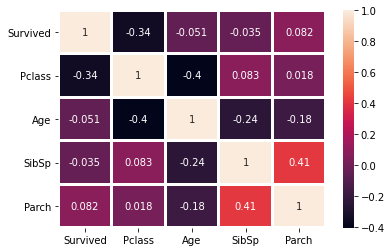

In [434]:
sns.heatmap(Train.corr(),annot=True, linewidths=2, linecolor='white')
plt.show()

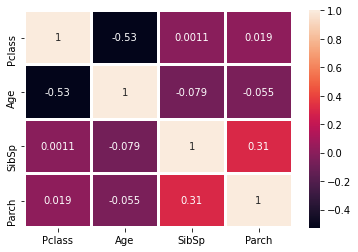

In [435]:
sns.heatmap(Test.corr(),annot=True, linewidths=2, linecolor='white')
plt.show()

## Implementing the Solution

In [542]:
Train['Pclass'] = preprocessing.LabelEncoder().fit_transform(Train['Pclass'])
Test['Pclass'] = preprocessing.LabelEncoder().fit_transform(Test['Pclass'])
Train['Sex'] = preprocessing.LabelEncoder().fit_transform(Train['Sex'])
Test['Sex'] = preprocessing.LabelEncoder().fit_transform(Test['Sex'])
Train['Embarked'] = preprocessing.LabelEncoder().fit_transform(Train['Embarked'])
Test['Embarked'] = preprocessing.LabelEncoder().fit_transform(Test['Embarked'])

In [543]:
Train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,2,1,22.0,1,0,2
1,1,0,0,38.0,1,0,0
2,1,2,0,26.0,0,0,2
3,1,0,0,35.0,1,0,2
4,0,2,1,35.0,0,0,2


In [544]:
Test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,2,1,34.5,0,0,1
1,2,0,47.0,1,0,2
2,1,1,62.0,0,0,1
3,2,1,27.0,0,0,2
4,2,0,22.0,1,1,2


In [545]:
X = Train.drop(['Survived'], axis=1).copy()
y = Train['Survived'].copy()

In [546]:
from sklearn.preprocessing import Normalizer
# Create normalizer
normalizer = Normalizer()

# Transform feature matrix
normalizer.transform(X)

array([[0.08998425, 0.04499213, 0.9898268 , 0.04499213, 0.        ,
        0.08998425],
       [0.        , 0.        , 0.99965392, 0.02630668, 0.        ,
        0.        ],
       [0.07647191, 0.        , 0.99413485, 0.        , 0.        ,
        0.07647191],
       ...,
       [0.07874682, 0.        , 0.98987199, 0.03937341, 0.07874682,
        0.07874682],
       [0.        , 0.03843312, 0.99926117, 0.        , 0.        ,
        0.        ],
       [0.0623177 , 0.03115885, 0.99708312, 0.        , 0.        ,
        0.03115885]])

### 80% training dataset - 20% testing dataset 

In [547]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [548]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [549]:
parameters = {'n_neighbors': list(range(1,30)),
              'leaf_size': list(range(1,50)),
              'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis'],
              }


knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, 
                           param_grid=parameters)

print(grid_search.fit(x_train, y_train))
print('')
print('')
print('The parameters:')
print(grid_search.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski', 'wminkowski', 'seuclidean',
                                    'mahalanobis'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 1

In [550]:
grid_search.best_params_

{'leaf_size': 2, 'metric': 'euclidean', 'n_neighbors': 28}

In [551]:
par = grid_search.best_params_

leaf_size = par['leaf_size']
n_neighbors = par['n_neighbors']
metric = par['metric']

In [552]:
classifier = KNeighborsClassifier(n_neighbors=n_neighbors, leaf_size=leaf_size, metric=metric)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')

In [553]:
y_pred = classifier.predict(x_test)

In [554]:
y_pred 

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [555]:
from sklearn.metrics import accuracy_score

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')
#0.7877094972067039 lda
# 0.7988826815642458 
# 0.8044692737430168 sd

Accuracy score of 0.8100558659217877


In [556]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

The confusion matrix:


array([[95, 10],
       [24, 50]])

### 70% training dataset - 30% testing dataset

In [557]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [558]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [559]:
parameters = {'n_neighbors': list(range(1,30)),
              'leaf_size': list(range(1,50)),
              'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis'],
              }


knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, 
                           param_grid=parameters)

print(grid_search.fit(x_train, y_train))
print('')
print('')
print('The parameters:')
print(grid_search.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski', 'wminkowski', 'seuclidean',
                                    'mahalanobis'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 1

In [560]:
par = grid_search.best_params_

leaf_size = par['leaf_size']
n_neighbors = par['n_neighbors']
metric = par['metric']

In [561]:
classifier = KNeighborsClassifier(n_neighbors=n_neighbors, leaf_size=leaf_size)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=32, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [562]:
y_pred = classifier.predict(x_test)

In [563]:
from sklearn.metrics import accuracy_score

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')

Accuracy score of 0.753731343283582


In [564]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

The confusion matrix:


array([[137,  20],
       [ 46,  65]])

### 60% training dataset - 40% testing dataset

In [565]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [566]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [567]:
parameters = {'n_neighbors': list(range(1,30)),
              'leaf_size': list(range(1,50)),
              'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'wminkowski', 'seuclidean', 'mahalanobis'],
              }


knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, 
                           param_grid=parameters)

print(grid_search.fit(x_train, y_train))
print('')
print('')
print('The parameters:')
print(grid_search.best_params_)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski', 'wminkowski', 'seuclidean',
                                    'mahalanobis'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 1

In [568]:
grid_search.best_params_

{'leaf_size': 2, 'metric': 'euclidean', 'n_neighbors': 29}

In [569]:
par = grid_search.best_params_

leaf_size = par['leaf_size']
n_neighbors = par['n_neighbors']
metric = par['metric']

In [570]:
classifier = KNeighborsClassifier(n_neighbors=n_neighbors, leaf_size=leaf_size)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='uniform')

In [571]:
y_pred = classifier.predict(x_test)


In [572]:
from sklearn.metrics import accuracy_score

print(f'Accuracy score of {accuracy_score(y_test, y_pred)}')
# 0.803921568627451

Accuracy score of 0.803921568627451


In [573]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print('The confusion matrix:')
confusion_matrix

The confusion matrix:


array([[199,  17],
       [ 53,  88]])

## Conlusion

> the 80 - 20 modal performed best with an accurancy score 81 